Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

Load the data

In [2]:
data = pd.read_csv('startup_data.csv')

Preprocessing

In [3]:
data.shape

(923, 49)

In [4]:
# lets keep 100 rows for testing later!
data_to_test = data.tail(100)
data_to_test.to_csv(r"C:\Users\CChelmi\BBDA_project3_supervised_ML\cleaning100rowstest_data_for_test", index = False) # save the data to test later

In [5]:
data = data.drop(data_to_test.index) # keep a dataset without the 100 rows and name it 'data'
data.shape

(823, 49)

In [6]:
# Transforming the target column to boolian

data.replace(to_replace = ['acquired','closed'],value = [1,0], inplace = True) # 1 for acquired and 0 for closed

In [7]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                823 non-null    int64  
 1   state_code                823 non-null    object 
 2   latitude                  823 non-null    float64
 3   longitude                 823 non-null    float64
 4   zip_code                  823 non-null    object 
 5   id                        823 non-null    object 
 6   city                      823 non-null    object 
 7   Unnamed: 6                384 non-null    object 
 8   name                      823 non-null    object 
 9   labels                    823 non-null    int64  
 10  founded_at                823 non-null    object 
 11  closed_at                 302 non-null    object 
 12  first_funding_at          823 non-null    object 
 13  last_funding_at           823 non-null    object 
 14  age_first_

In [8]:
# checking for missing values
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  439
name                          0
labels                        0
founded_at                    0
closed_at                   521
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    141
age_last_milestone_year     141
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
# checking the sum of missing values
data.isnull().sum().sum()

1243

In [10]:
# check the statistics of the data
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,682.000000,682.000000,823.000000,823.000000,8.230000e+02,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,571.929526,38.514740,-103.387944,0.643985,2.221836,3.913024,3.063513,4.790902,7.731470,2.317132,2.634635e+07,1.839611,0.522479,0.116646,0.091130,0.044957,0.223572,0.167679,0.160389,0.082625,0.081409,0.065614,0.057108,0.029162,0.037667,0.002430,0.315917,0.319563,0.258809,0.516403,0.391252,0.228433,0.099635,2.792424,0.806804,0.643985
std,335.009983,3.669509,22.215104,0.479111,2.500585,2.991667,2.989482,3.263351,7.351255,1.394388,2.006804e+08,1.342198,0.499798,0.321194,0.287969,0.207337,0.416892,0.373808,0.367189,0.275481,0.273629,0.247756,0.232190,0.168362,0.190506,0.049266,0.465163,0.466591,0.438247,0.500035,0.488327,0.420078,0.299695,1.854997,0.395045,0.479111
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,280.500000,37.389551,-122.192337,0.000000,0.580800,1.656150,1.000000,2.397300,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,573.000000,37.779281,-118.374037,1.000000,1.471200,3.476700,2.550650,4.475350,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000
75%,867.500000,40.730646,-77.090212,1.000000,3.494500,5.523250,4.582225,6.786325,10.000000,3.000000,2.450527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,1.000000
max,1153.000000,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [11]:
# Separate object vs numeric columns:

obj_cols = data.select_dtypes(include='object').columns.to_list() # object columns
print(obj_cols)
print(len(obj_cols))

['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id']
13


In [12]:
num_cols = data.select_dtypes(exclude='object').columns.to_list() # numeric columns
print(num_cols)
print(len(num_cols))

['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']
36


In [13]:
# Creating a new dataset with the numeric columns so I can create a heatmap to investigate the correlations:

num_df = pd.DataFrame(data[num_cols])
num_df.head()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


<Axes: >

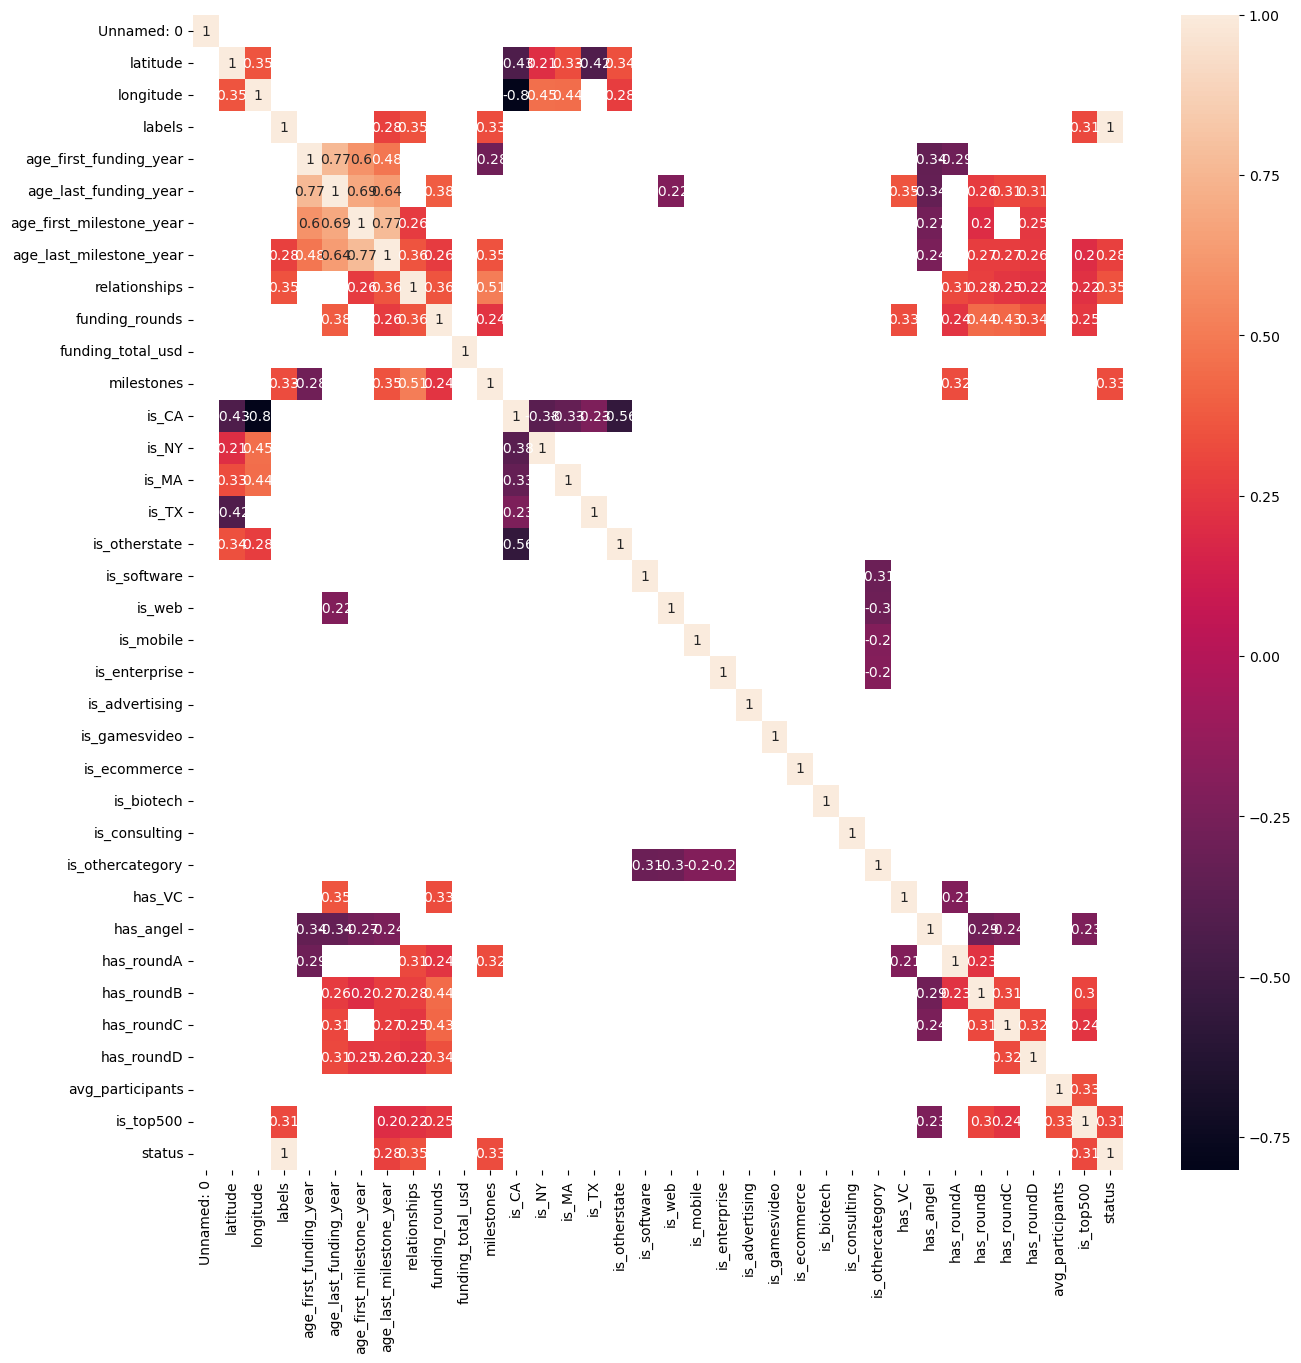

In [14]:
# Checking the correlation between the numeric columns and the target column and plot it in a heatmap
corr = num_df.corr()
high_corr = corr[abs(corr)>0.2]
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, annot = True)

From the correlation heatmap we understand that we need to drop the following columns:
Labels is highly correlated with status, will drop

In [15]:
# check unique values in state_code column
data['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ'],
      dtype=object)

In [16]:
# check the number of unique values in state_code column
data['state_code'].nunique()

32

In [17]:
# We want to see the top 3 states with the most start ups
data['state_code'].value_counts().head(3)

state_code
CA    431
NY     96
MA     75
Name: count, dtype: int64

CA    431

NY     96

MA     75

In [18]:
data['category_code'].nunique()

35

In [19]:
data['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [20]:
data['category_code'].value_counts().head(10)

category_code
software           138
web                132
mobile              68
enterprise          67
advertising         54
games_video         47
network_hosting     32
biotech             31
semiconductor       28
ecommerce           24
Name: count, dtype: int64

In [21]:
# We only want the top 3 states, so we are moving the Texas start ups in the otherstate column 
data['is_otherstate'] = data['is_otherstate'] + data['is_TX']
data['is_otherstate'] 

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     1
21     1
22     0
23     0
24     1
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     1
35     0
36     0
37     0
38     0
39     0
40     1
41     1
42     0
43     1
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     1
53     0
54     0
55     0
56     0
57     0
58     0
59     1
60     0
61     0
62     1
63     1
64     0
65     0
66     1
67     1
68     0
69     0
70     0
71     0
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     0
80     0
81     1
82     1
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    1
101    1
102    1
103    0
104    0
105    1
106    1
107    1
108    0
109    1
110    0
1

In [212]:
# Columns too look into more   'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', : probably to make them dates
# Columns for OHE 'category_code'

In [213]:
# OHE in category_code column, then I will also drop the 

OHE_col = ['category_code']
data = pd.get_dummies(data,columns = OHE_col) 
data.replace(to_replace = [True, False],value = [1,0], inplace = True)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
data['founded_at']=pd.to_datetime(data['founded_at'])
data['funded_year']=data['founded_at'].dt.year
#data['year']
data['funded_month']=data['founded_at'].dt.month
#data['month']
data['closed_at']=pd.to_datetime(data['closed_at'])
data['closure_year']=data['closed_at'].dt.year
#data['year']
data['closure_month']=data['closed_at'].dt.month
#data['month']

In [215]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,funded_month,closure_year,closure_month
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,2007-01-01,NaT,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,1,NaN,NaN
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,2000-01-01,NaT,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,1,NaN,NaN
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,NaT,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,3,NaN,NaN
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,NaT,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,1,NaN,NaN
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,8,2012.0,10.0


In [216]:
#data['closure_year'] = data['closure_year'].astype(int)
#data['closure_month'] = data['closure_month'].astype(int)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      823 non-null    int64         
 1   state_code                      823 non-null    object        
 2   latitude                        823 non-null    float64       
 3   longitude                       823 non-null    float64       
 4   zip_code                        823 non-null    object        
 5   id                              823 non-null    object        
 6   city                            823 non-null    object        
 7   Unnamed: 6                      384 non-null    object        
 8   name                            823 non-null    object        
 9   labels                          823 non-null    int64         
 10  founded_at                      823 non-null    datetime64[ns]
 11  closed

In [218]:
# Drop columns with no useful/important information and highly correlated columns

data.drop(['Unnamed: 0', 'Unnamed: 6' , 'zip_code', 'state_code', 'state_code.1', 'name', 'labels', 'is_TX', 'id', 'city', 'object_id'] , axis =1, inplace = True)

In [219]:
data.shape

(823, 76)

In [220]:
data.head()

,latitude,longitude,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,funded_month,closure_year,closure_month
0,42.358880,-71.056820,2007-01-01,NaT,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,1,NaN,NaN
1,37.238916,-121.973718,2000-01-01,NaT,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,1,NaN,NaN
2,32.901049,-117.192656,2009-03-18,NaT,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,3,NaN,NaN
3,37.320309,-122.050040,2002-01-01,NaT,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,1,NaN,NaN
4,37.779281,-122.419236,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,8,2012.0,10.0


In [221]:
data.isnull().sum()

latitude                            0
longitude                           0
founded_at                          0
closed_at                         521
first_funding_at                    0
last_funding_at                     0
age_first_funding_year              0
age_last_funding_year               0
age_first_milestone_year          141
age_last_milestone_year           141
relationships                       0
funding_rounds                      0
funding_total_usd                   0
milestones                          0
is_CA                               0
is_NY                               0
is_MA                               0
is_otherstate                       0
is_software                         0
is_web                              0
is_mobile                           0
is_enterprise                       0
is_advertising                      0
is_gamesvideo                       0
is_ecommerce                        0
is_biotech                          0
is_consultin

In [222]:
data['status'].value_counts()

status
1    530
0    293
Name: count, dtype: int64

In [223]:
acquired_df = pd.DataFrame(data[data['status'] == 1])

In [224]:
acquired_df['closure_year'].unique()

array([  nan, 2001., 2011., 2009., 2013., 2012., 2008., 2010.])

In [225]:
acquired_df['closure_year'].nunique()

7

In [226]:
acquired_df['closure_year'].value_counts()

closure_year
2011.0    3
2001.0    1
2009.0    1
2013.0    1
2012.0    1
2008.0    1
2010.0    1
Name: count, dtype: int64

In [227]:
df = data.copy()